In [17]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append("../utils/")
import pre_processing

In [40]:
save_dir = "../../process/pre-intergration/normalization"

In [41]:
!mkdir save_dir

mkdir: cannot create directory ‘save_dir’: File exists


In [42]:
save_dir

'../../process/pre-intergration/normalization'

In [2]:
adata = sc.read("../../process/pre-intergration/big_data/20241007_mergeall_normalized_step2.h5ad")

In [3]:
meta = pd.read_csv("../../processed_data/metadata/scMetadata_latest.csv",index_col=0)

/tmp/ipykernel_623784/2179861090.py:1: DtypeWarning: Columns (20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv("../../processed_data/metadata/scMetadata_latest.csv",index_col=0)


In [4]:
meta[1:5]

,orig.ident,nCount_RNA,nFeature_RNA,coarse_anno_1,total_counts,log10_total_counts,n_genes_detected,mito_frac,ribo_frac,compl,...,Development stage,Disease,Strain,Dissociation_enzyme,Machine,Species,Related assay,Journal,Data Source,Data location
index,,,,,,,,,,,,,,,,,,,,,
AAACCCAAGCTAAGTA-1_1_1,ToothNc_Junjun_E13.5,2587.0,1233,Mesenchyme,2587.0,3.412796,1233,0.143796,0.187089,0.476614,...,Bud,Not provided,C57BL/6,Dispase (Roche) and Collagenase I (Gibco),10X(unknown),Mus Musculus,Spatiotemporal single-cell regulatory atlas re...,Nature Communication,GSE189381,preprocess_data/ToothNc_Junjun.Rds
AAACCCAAGTGATTCC-1_1_1,ToothNc_Junjun_E13.5,14429.0,3934,Epithelium,14429.0,4.159236,3934,0.045533,0.231478,0.272645,...,Bud,Not provided,C57BL/6,Dispase (Roche) and Collagenase I (Gibco),10X(unknown),Mus Musculus,Spatiotemporal single-cell regulatory atlas re...,Nature Communication,GSE189381,preprocess_data/ToothNc_Junjun.Rds
AAACCCACAAGATTGA-1_1_1,ToothNc_Junjun_E13.5,2657.0,1418,RBC,2657.0,3.424392,1418,0.062476,0.212269,0.533685,...,Bud,Not provided,C57BL/6,Dispase (Roche) and Collagenase I (Gibco),10X(unknown),Mus Musculus,Spatiotemporal single-cell regulatory atlas re...,Nature Communication,GSE189381,preprocess_data/ToothNc_Junjun.Rds
AAACCCACACAACGAG-1_1_1,ToothNc_Junjun_E13.5,10948.0,3213,Endothelium,10948.0,4.039335,3213,0.074351,0.272653,0.293478,...,Bud,Not provided,C57BL/6,Dispase (Roche) and Collagenase I (Gibco),10X(unknown),Mus Musculus,Spatiotemporal single-cell regulatory atlas re...,Nature Communication,GSE189381,preprocess_data/ToothNc_Junjun.Rds


In [5]:
adata.obs[1:5]

,orig.ident,nCount_RNA,nFeature_RNA,coarse_anno_1,total_counts,log10_total_counts,n_genes_detected,mito_frac,ribo_frac,compl,size_factors
AAACCCAAGCTAAGTA-1_1_1,ToothNc_Junjun_E13.5,2587.0,1233,Mesenchyme,2587.0,3.412796,1233,0.143796,0.187089,0.476614,0.198762
AAACCCAAGTGATTCC-1_1_1,ToothNc_Junjun_E13.5,14429.0,3934,Epithelium,14429.0,4.159236,3934,0.045533,0.231478,0.272645,1.265106
AAACCCACAAGATTGA-1_1_1,ToothNc_Junjun_E13.5,2657.0,1418,RBC,2657.0,3.424392,1418,0.062476,0.212269,0.533685,0.233104
AAACCCACACAACGAG-1_1_1,ToothNc_Junjun_E13.5,10948.0,3213,Endothelium,10948.0,4.039335,3213,0.074351,0.272653,0.293478,0.787304


In [9]:
A = adata.obs
B = meta

In [6]:
overlapping_cols = adata.obs.columns.intersection(meta.columns)

In [ ]:
if not overlapping_cols.empty:
    print(f"Warning: Columns {overlapping_cols.tolist()} exist in both DataFrames. They will be replaced.")
    # Merge and replace overlapping columns
    result = A.combine_first(B)
else:
    print("No overlapping columns found. Merging without replacement.")
    # Merge without replacement
    result = A.join(B)



In [12]:
result.columns

Index(['Age', 'Core_datasets', 'Cre', 'Data Source', 'Data location',
       'Development stage', 'Disease', 'Dissociation_enzyme', 'FACs',
       'Gene Type', 'Histology', 'Journal', 'Knownout_gene', 'Machine',
       'Mandibular_Maxillary', 'Molar_Incisor', 'Project', 'Related assay',
       'Sample', 'Sex', 'Species', 'Stage', 'Strain', 'Tooth position',
       'Treatment', 'coarse_anno_1', 'compl', 'log10_total_counts',
       'log1p_n_genes_by_counts', 'log1p_total_counts', 'mito_frac',
       'nCount_RNA', 'nFeature_RNA', 'n_genes_by_counts', 'n_genes_detected',
       'orig.ident', 'pct_counts_in_top_100_genes',
       'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes',
       'pct_counts_in_top_50_genes', 'ribo_frac', 'size_factors',
       'total_counts'],
      dtype='object')

In [14]:
adata.obs = result

I made a function to cover the process above.

In [18]:
adata = pre_processing.merge_metadata(adata,meta)

In [19]:
adata

AnnData object with n_obs × n_vars = 372369 × 56053
    obs: 'Age', 'Core_datasets', 'Cre', 'Data Source', 'Data location', 'Development stage', 'Disease', 'Dissociation_enzyme', 'FACs', 'Gene Type', 'Histology', 'Journal', 'Knownout_gene', 'Machine', 'Mandibular_Maxillary', 'Molar_Incisor', 'Project', 'Related assay', 'Sample', 'Sex', 'Species', 'Stage', 'Strain', 'Tooth position', 'Treatment', 'coarse_anno_1', 'compl', 'log10_total_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'mito_frac', 'nCount_RNA', 'nFeature_RNA', 'n_genes_by_counts', 'n_genes_detected', 'orig.ident', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_counts_in_top_50_genes', 'ribo_frac', 'size_factors', 'total_counts'
    var: 'gene_symbol', 'gene_symbols', 'n_cells'
    uns: 'X_name'
    layers: 'counts'

In [27]:
projectName = adata.obs["Project"].unique()
projectLen = len(adata.obs["Project"].unique())

In [28]:
gb_values = sns.color_palette("Set2", projectLen)
color_labels = adata.obs["Project"].unique()
color_map = dict(zip(color_labels, gb_values))

In [33]:
gb_values

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
 (0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961)]

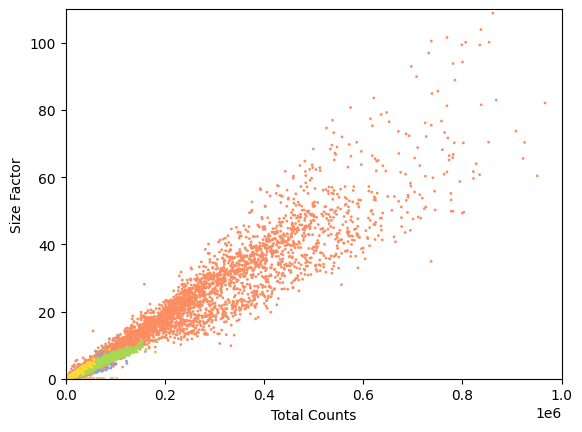

In [43]:
colors = []
for project in adata.obs["Project"].values:
    color = color_map.get(project)
    if color is None:
        # Provide a default color if None is found
        color = 'gray'  # or any other default color you prefer
    colors.append(color)

# Now create the scatter plot
plt.scatter(
    adata.obs.total_counts,
    adata.obs.size_factors,
    c=colors,
    s=1
)
plt.xlabel("Total Counts")
plt.ylabel("Size Factor")

# Set x and y limits
plt.xlim(0, 1000000)  # Replace with your desired limits for x-axis
plt.ylim(0, 110)     # Replace with your desired limits for y-axis
plt.savefig(f"{save_dir}/qc_sizefactor_count.pdf")
plt.show()

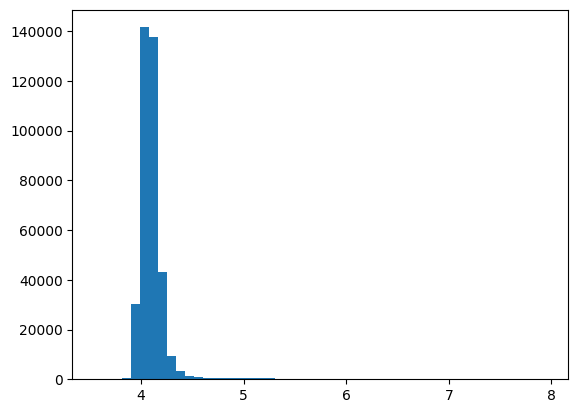

In [45]:
new_totals = np.array(np.sum(adata.X, axis=1))
plt.hist(np.log10(new_totals), bins=50)
plt.savefig(f"{save_dir}/qc_count_barplot")
plt.show()

In [ ]:
plt.scatter(
    adata.obs.n_genes_by_counts.values,
    np.log10(new_totals),
    s=1,
    c=list(map(lambda x: color_map.get(x), adata.obs["Project"].values)),
)


plt.xlabel("n genes detected")
plt.ylabel("log10(total counts after normalization)")
plt.title("norm total counts vs n genes detected")
plt.legend(labels="test")

plt.show()

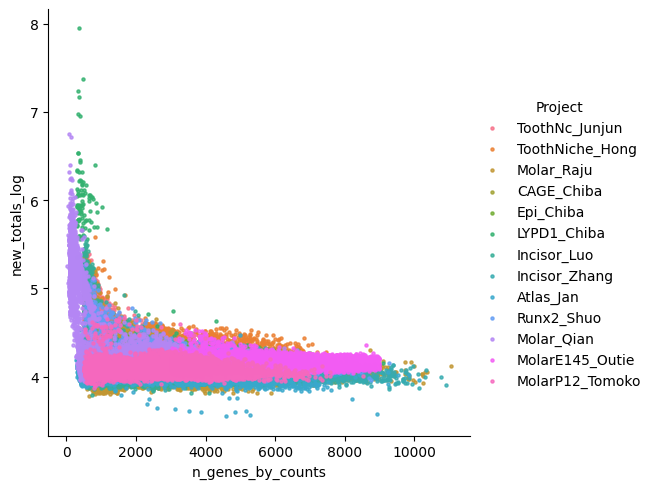

In [48]:
plotdf = adata.obs
plotdf["new_totals_log"] = np.log10(new_totals)
sns.lmplot(
    x="n_genes_by_counts",
    y="new_totals_log",
    data=plotdf,
    hue="Project",
    fit_reg=False,
    scatter_kws={"s": 5},
)
plt.savefig(f"{save_dir}/qc_count_genedetect.pdf")
plt.show()

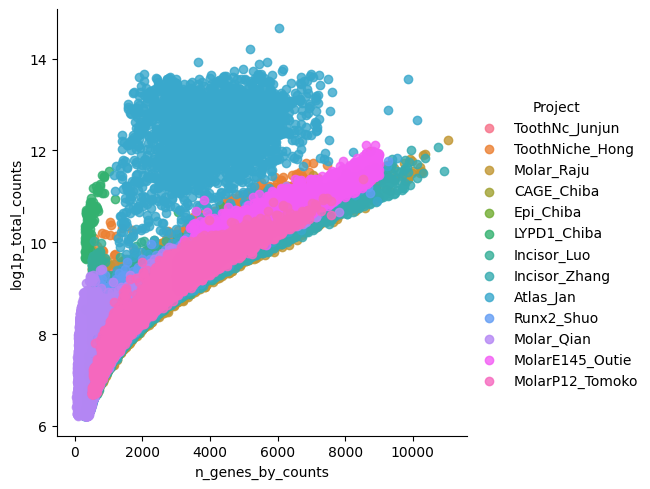

In [49]:
sns.lmplot(
    x="n_genes_by_counts",
    y="log1p_total_counts",
    data=adata.obs,
    hue="Project",
    fit_reg=False,
)
plt.savefig(f"{save_dir}/qc_count_genedetect2.pdf")
plt.show()

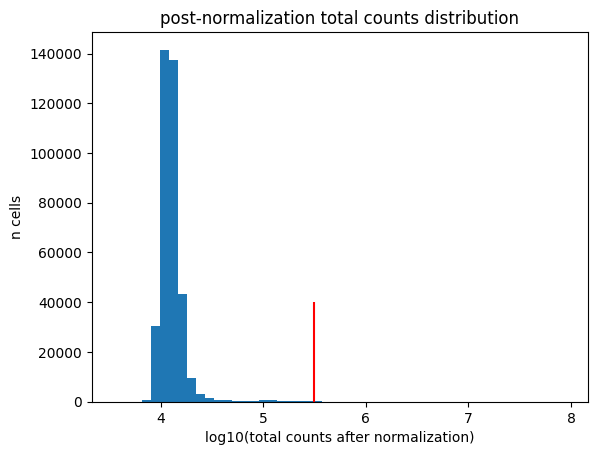

In [51]:
plt.hist(np.log10(new_totals), bins=50)
plt.xlabel("log10(total counts after normalization)")
plt.ylabel("n cells")
plt.vlines(x=5.5, ymin=0, ymax=40000, color="red")
plt.title("post-normalization total counts distribution")
plt.show()

In [ ]:
plt.scatter(
    adata.obs.n_genes_by_counts.values,
    np.log10(new_totals),
    s=1,
)
plt.hlines(y=5.5,xmin=0, xmax=10000, color="red")
plt.xlabel("n genes detected")
plt.ylabel("log10(total counts after normalization)")
plt.title("norm total counts vs n genes detected")
plt.show()

In [ ]:
plt.scatter(
    np.log10(adata.obs.size_factors), np.log10(adata.obs.n_genes_by_counts), s=1
)
plt.vlines(x=np.log10(0.02), ymin=2, ymax=4, color="red")
plt.xlabel("SCRAN size factor")
plt.ylabel("n genes detected")
plt.title("SCRAN size factor vs n_genes_detected")
plt.show()

In [ ]:
plt.hist(np.log10(adata.obs.size_factors), bins=50)
plt.xlabel("log10(1/size_factor)")
plt.ylabel("ncells")
plt.vlines(x=np.log10(0.02), ymin=0, ymax=30000, color="red")
plt.title("SCRAN size factor distribution")
plt.show()

In [ ]:
plt.scatter(np.log10(adata.obs.size_factors.values), np.log10(new_totals), s=1)
plt.vlines(x=np.log10(0.02), ymin=3.5, ymax=6, color="red")
plt.hlines(y=5.2, xmin=-2, xmax=1, color="red")
plt.xlabel("log10(size factor)")
plt.ylabel("log10(total count after SCRAN norm)")
plt.show()